<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سرشاخ با رگرسیون
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>توجه:</b></span>
در تمامی پلات‌های خواسته شده در این تمرین، نام‌گذاری بردار‌ها الزامی است.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین می‌خواهیم اصول عملکرد رگرسیون خطی را به دو روش <b>الگوریتم گرادیان کاهشی (Gradient Descent)</b> و <b>معادلات نرمال (Normal Equation)</b>  درک کنیم. همچنین سعی شده در خلال تمرین مفاهیمی از قبیل تاثیر نرمال‌سازی داده‌ها در روند یادگیری ماشین، نرخ‌یادگیری در الگوریتم گرادیان کاهشی، رگولاریزیشن/منظم‌سازی (Regularization)، موازنه‌ی بایاس واریانس و غیره را مطرح و در رابطه با آن‌ها بحث کنیم. برای شروع این تمرین هیجان‌انگیز با اجرای سل زیر کتابخانه‌های لازم را فراخوانده و داده را از فایل <code>Housing.csv</code> بخوانید و در متغیر <code>df</code> ذخیره نمایید.
</font>
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Housing.csv')
# df = TO-DO
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با بررسی سطر‌های تکراری یا داده‌های مفقوده متوجه‌ می‌شویم داده‌های نسبتاً تمیزی در اختیارمان قرار گرفته است و در این تمرین چندان درگیر پیش‌پردازش داده نمی‌شویم. ستون اول از دیتافریم را به‌عنوان هدف مسئله رگرسیون خطی پیش‌رو انتخاب کنید و در متغیر <code>y</code> و
ستون دوم دیتافریم که بیان‌گر مساحت خانه‌ است را در بخش اول سوال به عنوان تنها ورودی مسئله در متغیر <code>x</code> ذخیره کنید.
</font>
</p>


In [21]:
# x = TO-DO
x=df["area"]
y=df["price"]

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
از آن‌جا که حدود متغیر‌های <code>x</code> و <code>y</code> بسیار زیاد است،
هر دو متغیر را بر <code>۱۰۰۰۰</code> تقسیم کنید اما در تحلیل‌ نتایج این موضوع را فراموش نکنید (فعلاً نمی‌خواهیم از نرما‌ل‌سازی یا استانداردسازی داده‌ها استفاده کنیم).
</font>
</p>


In [22]:
x_scaled = x/10000
y_scaled  = y/10000

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به این‌که در رگرسیون خطی یک عرض از مبدا برای خط رگرسور تعریف می‌شود، برای انجام ضرب ماتریسی میان ماتریس ورودی و بردار ضرایب رگرسیون یک ستون با مقدار <code>1</code> به <code>x</code> اضافه کرده و در متغیر <code>X</code> ذخیره نمایید. پیشنهاد می‌شود <code>y</code> و <code>X</code> را جهت تسریع محاسبات آتی به آرایه‌های نامپای تبدیل کنید (<code>Shape</code> آرایه‌های <code>X</code> و <code>y</code> به‌صورت کامنت‌ آمده است).
</font>
</p>


In [23]:
y_one=y_scaled.to_numpy()
x_one=x_scaled.to_numpy()
x_two= np.c_[x_one, np.ones(len(x_one))]
Y=y_one.reshape(545,1)
X=x_two.reshape(545,2)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
قبل از شروع به حل یک مسئله، اغلب مفید است که داده‌های مسئله را ترسیم کنید تا درک بهتری از مسئله پیدا کنید.
اسکترپلات <code>x</code> و <code>y</code> را رسم نمایید تا نحوه‌ی توزیع نقاط در این صفحه را مشاهده کنید.
</font>
</p>


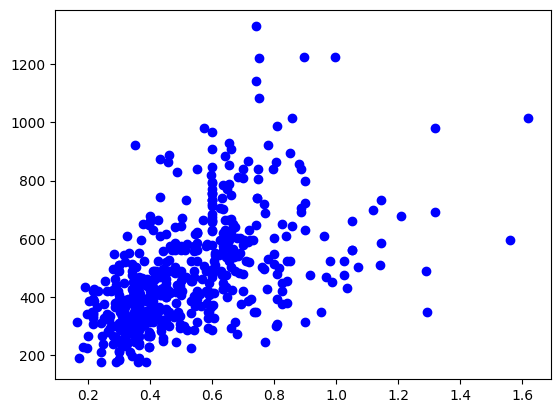

<Figure size 640x480 with 0 Axes>

In [24]:
plt.scatter(X[:,0], Y, color='blue')
plt.show()


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش اول: رگرسیون تک‌متغیره
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم مسئله رگرسیون خطی برای پیش‌بینی مقدار قیمت خانه با استفاده از مساحت‌ خانه را نخست به روش گرادیان کاهشی، سپس با استفاده از معادلات نرمال حل کنیم. بدین منظور از شما می‌خواهیم تمامی توابع لازم را خودتان بنویسید و در پایان نتایج را با نتایج دستور رگرسیون خطی پکیج <code>scikit-learn</code> مقایسه خواهیم کرد.
<br>
رگرسیون خطی برای حالت تک متغیره:
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تخمین‌گر خطی:
$ h_\theta (x) = \theta_0 + \theta_1 x $
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ضرایب رگرسیون:
$\theta_0 $, $\theta_1$
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
$m$ = تعداد نمونه‌های یادگیری <br><br>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
$n$ = تعداد ویژگی‌ها (در حالت تک متغیره برابر ۱ است) <br><br>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
$\alpha$ = نرخ یادگیری


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
هدف مسئله کمینه کردن تابع هزینه‌ J است. در مسئله‌ی رگرسیون خطی تک متغیره تابع هزینه به شکل زیر تعریف می‌شود:
</font>
</p>

$$J(\theta_0, \theta_1) = \frac{1}{(2m)}\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)^{2}$$


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
که در آن رگرسور به شکل زیر تعریف شده است:
</font>
</p>

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
الگوریتم گرادیان کاهشی
</font>
</h3>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در هر گام این الگوریتم نخست مشتق تابع هزینه محاسبه شده و به وسیله‌‌ی آن ضرایب رگرسیون مطابق فرمول زیر به‌روزرسانی می‌شوند. این عمل تا همگرایی الگوریتم ادامه پیدا می‌کند.

</font>
</p>

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J\Bigl(\theta_0, \theta_1\Bigr)$$


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>که در آن برای j=0:
</font>
</p>


$$\frac{\partial}{\partial \theta_0} J\Bigl(\theta_0, \theta_1\Bigr) = \frac{1}{m}\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)$$


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> و برای j های مخالف صفر:
</font>
</p>

   
$$\frac{\partial}{\partial \theta_j} J\Bigl(\theta_0, \theta_1\Bigr) = \frac{1}{m}\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)x^{(i)}$$




<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در گام اول از شما می‌خواهیم تابعی برای محاسبه مقدار تابع هزینه‌ بنویسید.
ورودی‌های این تابع به ترتیب ماتریس <code>X</code>، بردار <code>y</code> و ضرایب theta هستند و خروجی این تابع مقدار تابع هزینه است.
در  نوشتن این تابع دقت داشته باشید که در این بخش رگرسیون تنها با یک متغیر ورودی صورت می‌گیرد اما در ادامه‌ی تمرین‌ قصد داریم رگرسیون چند متغیره را انجام دهیم و تابعی که در این مرحله می‌نویسید چنا‌نچه قابلیت تعمیم داشته باشد می‌تواند در بخش‌های بعد هم استفاده شود. برای راهنمایی <code>Shape</code> ورودی‌ها و خروجی تابع به ازای <code>X</code> و <code>y</code> که در بخش مقدمه ساخته‌اید و ضرایب رگرسیون در حالت تک متغیره به‌صورت کامنت در سل زیر نوشته شده است.
</font>
</p>


In [25]:
# X.shape = (545, 2)
# y.shape= (545, 1)
# theta_gd.shape = (2, 1)
# computeCost(X,y,theta_gd) = a float number
#bt0==arz az mabda
#teta1 ro mide
def computeCost(X, Y, theta_gd):
    m = len(X)
    # Y_pred=np.dot(X,theta_gd)
    prediction=X.dot( theta_gd)
    # s = np.power(( X.dot( theta_gd) - np.transpose([Y]) ), 2)
    J = (1.0/(2*m)) *(np.sum((prediction-Y)**2))

    
    # J = (1 / 2*m) * (np.sum(Y_pred -Y)**2)
    return(J) 

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال برای ضرایب رگرسیون مقدار اولیه صفر را در نظر گرفته و مقدار تابع هزینه را به ازای آن محاسبه نمایید.
</font>
</p>


In [27]:
theta_gd=[[0],[0]]   
J_initial = computeCost(X, Y, theta_gd)
print(J_initial)

131069.16364659269


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون با استفاده از تابع <code>computeCost</code> نوشته شده تابعی به نام <code>gradientDescent</code> بنویسید تا الگوریتم گرادیان کاهشی را  پیاده کند.
ورودی‌های این تابع ماتریس ورودی <code>X</code>، بردار هدف <code>y</code>، ضرایب رگرسیون اولیه، نرخ یادگیری و تعداد گام اجرای الگوریتم است و در خروجی به ترتیب ضرایب رگرسیون نهایی، تاریخچه تغییرات تابع هزینه و تاریخچه تغییرات ضرایب رگرسیون در طول فرآیند اجرای تابع  <code>gradientDescent</code> را خواهیم داشت.  برای راهنمایی ابعاد خروجی‌های تابع در حالت قبل و به ازای ۲۰۰ گام اجرای تابع به‌صورت کامنت آورده شده است.
</font>
</p>


In [28]:
m, n = X.shape
def gradientDescent(X, y, theta_gd, alpha, num_iters):
    """
    Performs gradient descent to learn 'theta_gd'. Updates theta by taking 'num_iters'
    gradient steps with learning rate 'alpha'.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    """
    theta_gd_history = np.zeros((num_iters, 2))
    J_history=np.zeros((num_iters, 1))
    for iter in np.arange(num_iters): #gradient descent iteration loop
        
        hypoth = X.dot(theta_gd) # determine the hypothesis for the current value of thetas
        dJ_theta_gd  = (1/m) * (X.T.dot(hypoth - y)) # Determine derivative of cost function
        theta_gd = theta_gd - alpha * dJ_theta_gd #calculate new values of theta
        
        # store calculated values of theta  
        theta_gd_history[iter][0] = theta_gd[0] 
        theta_gd_history[iter][1] = theta_gd[1]
        
        J_history[iter] = computeCost(X, y, theta_gd) #calclate the cost fucntion
    
    ###
    J_history.reshape(num_iters)
    theta_gd_history.reshape(2,num_iters)
    ###    
    return(theta_gd, J_history, theta_gd_history) # return final theta and the list of cost function results

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون الگوریتم گرادیان کاهشی را با توجه به تابعی که نوشته‌اید با ضرایب رگرسیون اولیه <code>0</code>، نرخ یادگیری <code>1</code> و به تعداد <code>10000</code> گام اجرا کنید و مقدار ضرایب رگرسیون نهایی و کمینه مقدار تابع هزینه را گزارش دهید.
</font>
</p>


In [30]:
# TO-DO
theta_gd=np.zeros((2,1))

theta_gd, J_history, theta_gd_history=gradientDescent(X, Y, theta_gd, 1, 10000)
print(theta_gd,np.min(J_history))


[[461.97489427]
 [238.73084824]] 12444.306990903286


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نمودار تغییرات ضرایب رگرسیون طی گام‌های اجرای الگوریتم فوق را رسم نمایید.
</font>
</p>


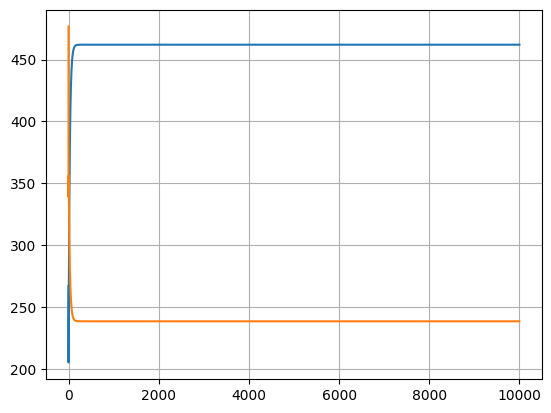

In [32]:
# TO-DO
alpha=1
num_iters=10000
theta_gd=np.array([[0],[0]])
theta_gd_2, J_history, theta_gd_history = gradientDescent(X, Y, theta_gd, alpha, num_iters) 
x_scale = np.arange(num_iters)
plt.figure()
plt.plot(x_scale, theta_gd_history)
plt.grid(True)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نمودار تغییرات مقدار تابع هزینه طی <code>1000</code> گام نخست را رسم کنید.</font>
</p>



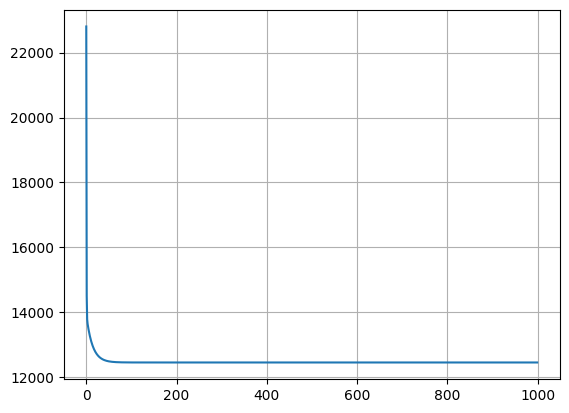

In [33]:
# TO-DO
alpha=1
num_iters=1000
theta_gd=np.array([[0],[0]])
theta_gd_1, J_history, theta_gd_history = gradientDescent(X, Y, theta_gd, alpha, num_iters) 
x_scale = np.arange(num_iters)
plt.figure()
plt.plot(x_scale, J_history)
plt.grid(True)

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معادلات نرمال
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون می‌خواهیم مسئله‌ی رگرسیون خطی را با استفاده از معادلات نرمال حل کنیم. از مزایای این روش این است که نیاز به نرمال‌سازی یا استانداردسازی داده‌ها ندارد. همچنین برای رسیدن به نقطه بهینه نیاز به استفاده از حلقه نیست. از معایب آن هم می‌توان به دشواری محاسبه ماتریس معکوس در ابعاد بالا و نیاز به مدیریت ماتریس <code dir=ltr>(X^T.X)</code> در صورت معکوس‌پذیر نبودن اشاره کرد. ضرایب رگرسیون در این روش با فرمول زیر محاسبه می‌شوند:
</font>
</p>

$$\theta  = \big(X^TX\Big)^{-1}X^Ty$$

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تابعی بنویسید که به‌صورت مستقیم (به روش معادلات نرمال) ضرایب رگرسیون را محاسبه کند. ورودی این تابع   ماتریس <code>X</code> و بردار <code>y</code> و خروجی آن ضرایب رگرسیون خطی است.</font>
</p>



In [34]:
def normalEqn(X, Y):
    theta = np.zeros((X.shape[1], 1))

# ====================== YOUR CODE HERE ======================
# Instructions: Complete the code to compute the closed form solution
#               to linear regression and put the result in theta.
#

# ---------------------- Sample Solution ----------------------
    theta = np.linalg.pinv(X.T @ X) @ X.T @ Y
    return theta

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
  با استفاده از تابع <code>normalEqn</code> مجددا رگرسیون خطی را انجام دهید و ضرایب رگرسیون و کمینه تابع هزینه را گزارش دهید.
</font>
</p>

In [35]:
# TO-DO
theta_norm=normalEqn(X, Y)
y_pred_norm = X @ theta_norm
print(theta_norm,min(y_pred_norm))

[[461.97489427]
 [238.73084824]] [314.95670579]


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کتابخانه‌ی <code>scikit-learn</code>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">

<font face="vazir" size=3>
بالاخره زمان فراخوانی پکیج <code>sklearn</code>  فرا رسیده است. با استفاده از این پکیج رگرسیون خطی را انجام داده و مقادیر ضرایب رگرسیون و مقدار کمینه تابع هزینه را گزارش دهید.  
</font>
</p>



In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, Y) 
reg.score(X, Y)
y_pred_sklearn=reg.predict(X)
print(reg.score(X, Y),min(y_pred_sklearn))


0.2872931546811467 [314.95670579]


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
معیار‌های ارزیابی متفاوتی برای مسائل رگرسیون وجود دارد. میانگین مربعات خطا (MSE)، میانگین اندازه خطا (MAE)، میزان همبستگی (correlation) و معیار R2‌ از جمله مهم‌ترین این معیارها هستند.
پیشنهاد می‌شود برای اطلاعات بیش‌تر به <a href="https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6519016-evaluate-the-performance-of-a-regression-model" target="_blank">این لینک</a>
مراجعه کنید.
تابع محاسبه معیار R2 ‌بر اساس خروجی به‌دست‌آمده از رگرسیون خطی و خروجی حقیقی را بنویسید.

</font>
</p>

$$ R^2 = 1 - \left(\frac{SS_{\text{Residual}}}{SS_{\text{Total}}}\right) $$

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>که در آن:
</font>
</p>

$$SS_{\text{Total}} = \sum_{i=1}^{m} (y^{(i)} - \mu)^2$$
$$SS_{\text{Residual}} = \sum_{i=1}^{m} (y^{(i)} - y^{(i)}_{pred})^2$$

In [37]:
def calculate_r2_score(y_true, y_pred):
    # TO-DO
    SS_res = np.sum(np.square(y_true - y_pred))
    SS_tot = np.sum(np.square(y_true - np.mean(y_true)))
    r2 = 1 - (SS_res / (SS_tot ))
    return r2

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مقدار R2-score را با تابعی که نوشته‌اید برای سه رگرسوری که به دست آورده‌اید محاسبه کنید.</font>
</p>



In [41]:
# TO-DO
theta_norm=normalEqn(X, Y)
y_pred_norm = X @ theta_norm
norm_r2=calculate_r2_score(Y,y_pred_norm)
# ----
y_pred_grad = X @ theta_norm
r2_grad=calculate_r2_score(Y,y_pred_grad)
# ---
r2_sklearn=calculate_r2_score(Y,y_pred_sklearn)
print(r2_sklearn,r2_grad,norm_r2)

0.2872931546811467 0.2872931546811468 0.2872931546811468


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در نهایت مجددا اسکترپلات قیمت بر حسب مساحت خانه را رسم کنید و این‌بار سه خط رگرسور بدست آمده را با <code>legend</code> بر روی تصویر رسم نمایید.</font>
</p>



C:\Users\novin.toos\AppData\Local\Temp\ipykernel_9152\4142340620.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "wo" (-> color='w'). The keyword argument will take precedence.
  plt.plot(X[:,0],y_pred_norm,'wo',color="red",label="Normal equation")


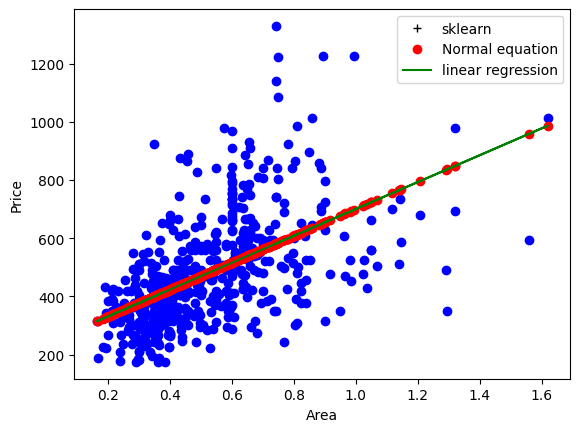

<Figure size 640x480 with 0 Axes>

In [43]:
plt.scatter(X[:,0], Y, color='blue')
plt.plot(X[:,0],y_pred_sklearn, 'k+',label="sklearn")
plt.plot(X[:,0],y_pred_norm,'wo',color="red",label="Normal equation")
plt.plot(X[:,0],y_pred_grad,label="linear regression",color="green")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش دوم: رگرسیون چندمتغیره
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در بخش دوم می‌خواهیم از دیگر ویژگی‌های عددی موجود در دیتافریم اولیه هم استفاده کنیم و پیاده‌سازی رگرسیون چند متغیره را تمرین کنیم. بدین جهت باید تعریف جدیدی برای ماتریس ويژگی‌ها داشته باشیم. این‌بار تمامی مقادیر عددی جز متغیر هدف (قیمت خانه) را درون ماتریس <code>X</code> قرار دهید. متغیر هدف (<code>y</code>) با همان تعریف قبلی در این بخش استفاده می‌شود.
</font>
</p>


In [45]:
# X = TO-DO
X=df[['area','bedrooms','bathrooms','stories','parking']]
y=df[['price']]

Y=y.to_numpy()
Y=Y/10000

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
هیستوگرام پنج ویژگی انتخاب شده را رسم کنید.
</font>
</p>


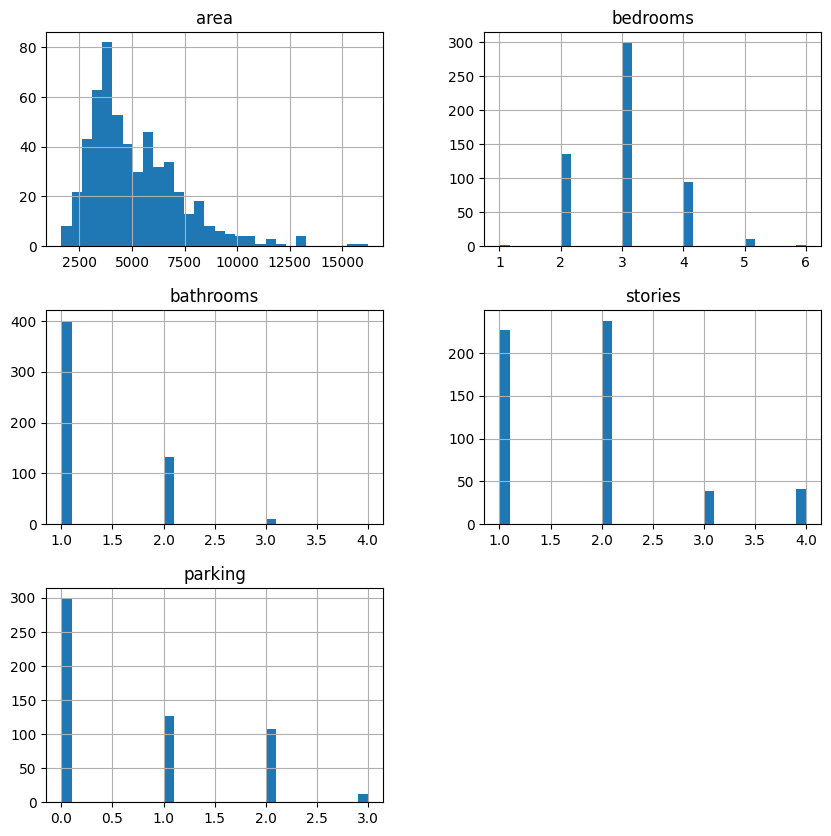

In [46]:
# TO-DO
X.hist(bins=30, figsize=(10, 10))

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همانطور که مشاهده می‌کنید مقادیر این پنج ویژگی‌ در بازه‌های بسیار متفاوتی قرار گرفته‌اند و برای تسریع روند همگرایی الگوریتم گرادیان کاهشی و عدم غلبه یک یا چند ویژگی با مقادیر بیش‌تر بر دیگر ویژگی‌ها باید داده‌ها را استاندارد کنیم.
تابعی بنویسید که یک دیتافریم را در ورودی دریافت کند و خروجی را استاندارد نماید. در این  تمرین از Min-Max scaling  استفاده نشد اما پیشنهاد می‌شود برای اطلاعات بیشتر در رابطه با این دو روش نرمال‌سازی به
<a href="https://www.geeksforgeeks.org/normalization-vs-standardization/" target="_blank">این لینک</a>
رجوع کنید.
</font>
</p>

$$x_i :=\frac{x_i - \mu_i}{S_i}$$

$\mu_i$ = میانگین ویژگی

${S_i}$ = انحراف از معیار ویژگی

In [47]:
def normalize_features(X):
   # mu = np.mean(X[:, :1])
   # sigma = np.std(X[:, :1])

   # mu1 = np.mean(X[:, 1:])
   # sigma1 = np.std(X[:, 1:])

   # x_ = (X[:, :1] - mu) / sigma
   # x1_ = (X[:, 1:] - mu1) / sigma1

   # X_norm = np.append(x_, x1_, axis = 1)
   
   # return X_norm
   mean = np.mean(X, axis=0)
   std = np.std(X, axis=0)
   X_normalized = (X - mean) / std
   return X_normalized

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با تابع نوشته شده فوق داده‌‌های ورودی را استاندارد نمایید و مجدداً هیستگورام آن‌ها را رسم کنید.
</font>
</p>


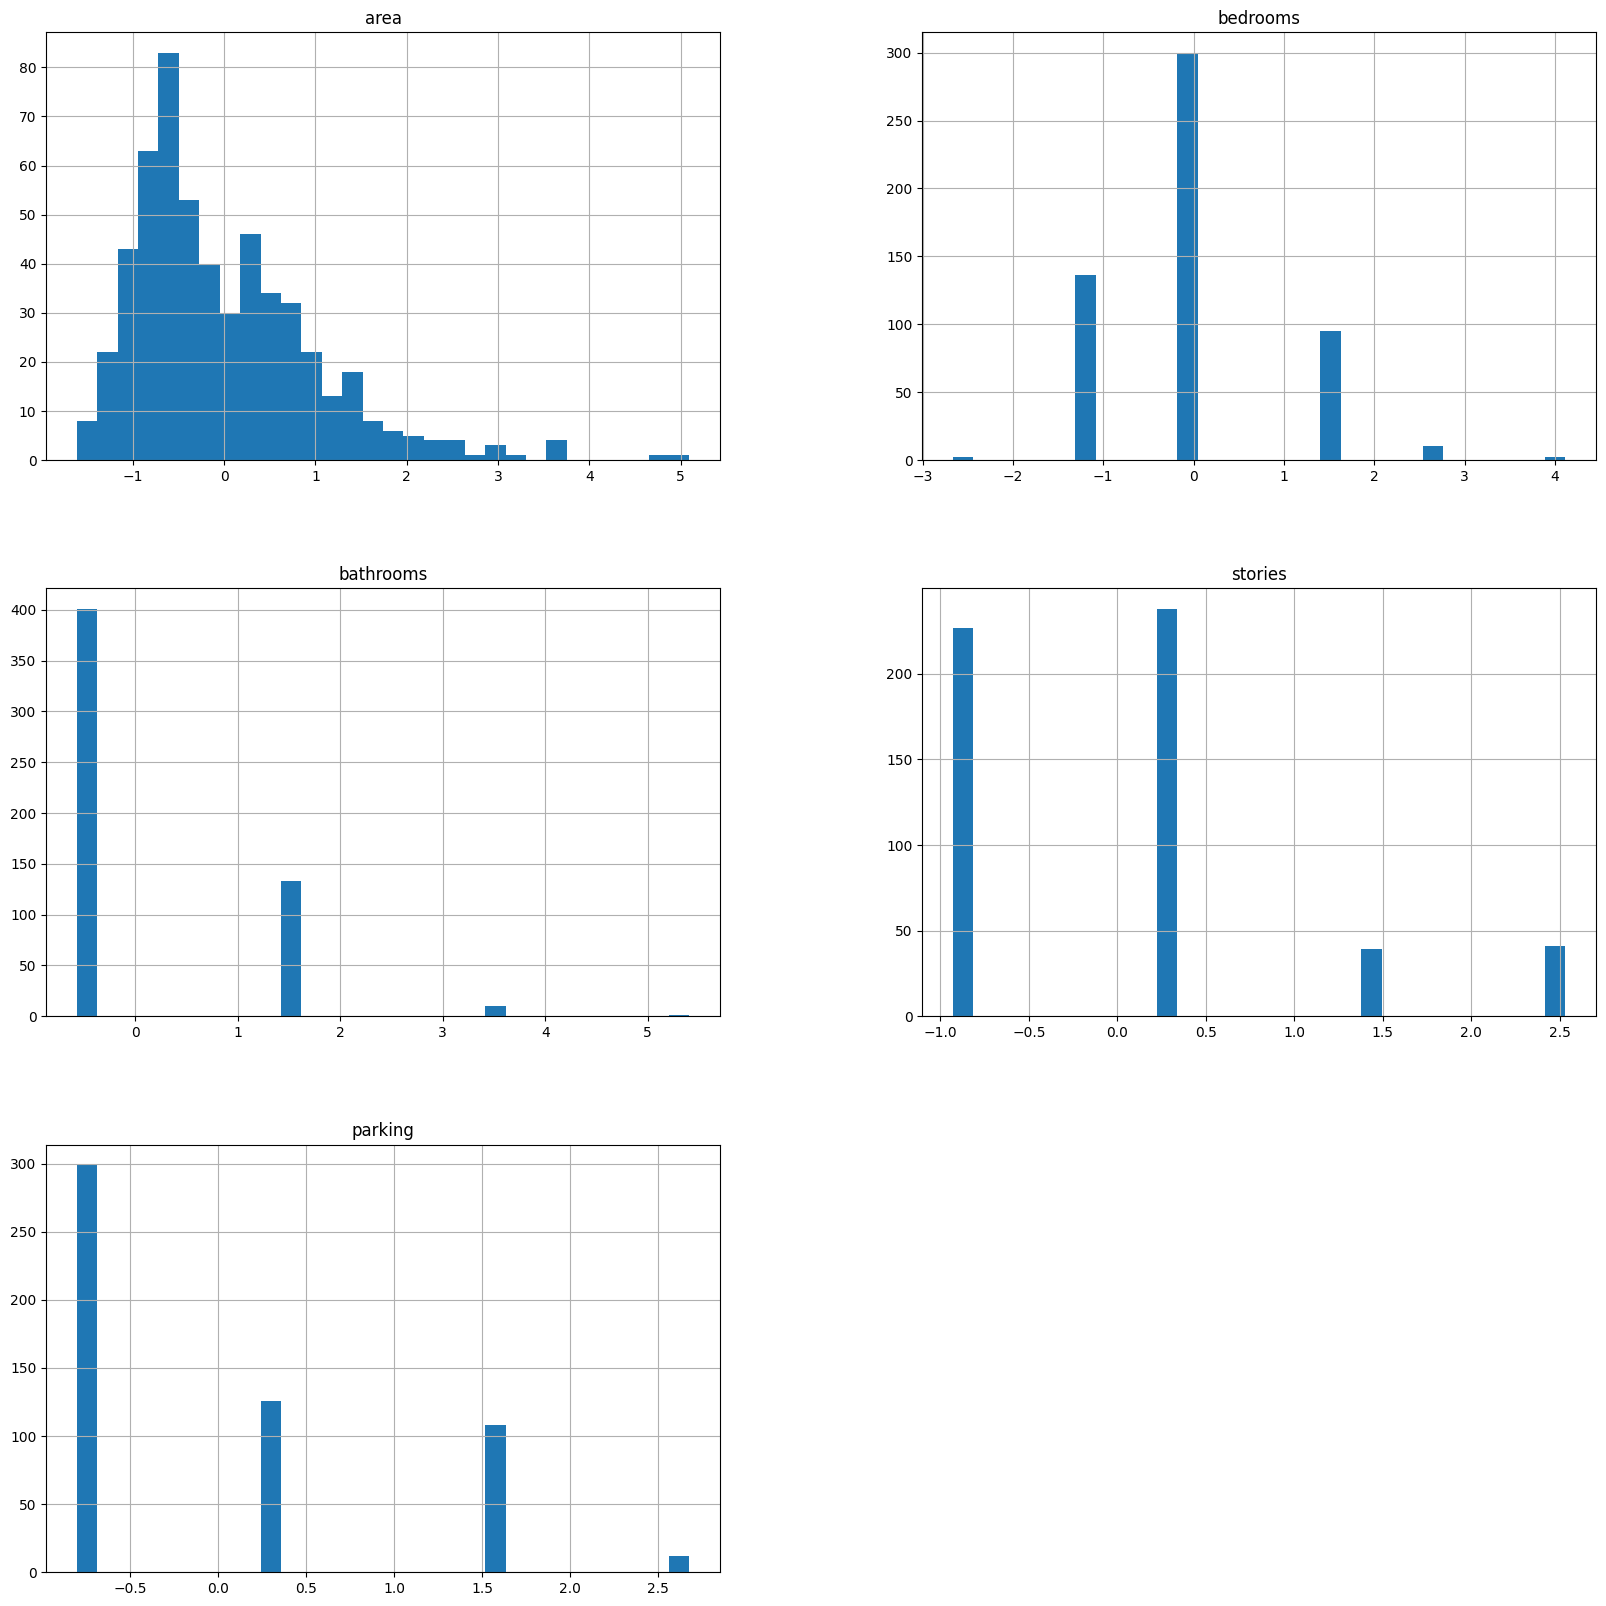

In [49]:
# TO-DO
X_norm=normalize_features(X)
X_norm.hist(bins=30, figsize=(20, 20))

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم روش گرادیان کاهشی را این بار برای رگرسیون چند متغیره استفاده کنیم. چنان‌چه توابع نوشته شده در بخش اول قابلیت تعمیم به ۵ متغیر را نداشتند توابع محاسبه مقدار تابع هزینه و الگوریتم گرادیان کاهشی را برای شرایط کنونی بنویسید. برای راهنمای ابعاد مقادیر ورودی و خروجی برای مثال این بخش به‌صورت کامنت آورده شده است.
</font>
</p>


In [50]:
# X=X.to_numpy()
X= np.c_[X_norm, np.ones(len(X))]
# x_twoo.shape
# Y=Y.reshape(545,1)
# X=X.reshape(545,6)
X.shape
# Y.shape

(545, 6)

In [51]:

#inputs:
# X.shape = (545, 6)
# y.shape= (545, 1)
# theta_gd.shape = (6, 1)
# Output:
# J = a float number


def computeCostMulti(X, Y, theta_gd):
    # TO-DO
    # m = y.size
    # J = 0
    # h = np.dot(X, theta)
    # sq_error = np.sum(np.square(h - y))
    # J = (sq_error) / (2 * m)
    
    m = len(Y)
    # Y_pred=np.dot(X,theta_gd)
    prediction=X.dot( theta_gd)
    # s = np.power(( X.dot( theta_gd) - np.transpose([Y]) ), 2)
    J = (1.0/(2*m)) *(np.sum((prediction-Y)**2))
    return J

In [52]:
theta_gd=np.zeros((6,1)) 
J_initial =  computeCostMulti(X, Y, theta_gd)
print(J_initial)

131069.16364659269


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از توابعی که خودتان نوشتید الگوریتم گرادیان کاهشی را برای یافتن بهترین رگرسیون خطی با نرخ یادگیری <code>0.1</code>، ضرایب رگرسیون اولیه‌ی <code>0</code> و <code>300</code> گام اجرا کنید و ضرایب رگرسیون نهایی و مقدار کمینه تابع هزینه را گزارش دهید.</font>
</p>


In [ ]:
#inputs:
# X.shape = (545, 6)
# y.shape= (545, 1)
# theta_gd.shape = (6, 1)
# alpha = a float number
# num_iters = 200 (for example)

#outputs:
# theta_gd.shape = (6, 1)
# J_history.shape= (200,)
# theta_gd_history.shape = (6, 200)

In [53]:
def gradientDescentMulti(X, y, theta_gd, alpha, num_iters):
    m=len(y)
    theta_gd_history = np.zeros((theta_gd.shape[0], num_iters))
    J_history=np.zeros(num_iters)
    for iter in range(num_iters):
        
        # hypoth = X.dot(theta_gd)
        # dJ_theta_gd  = (1/m) * (X.T.dot(hypoth - y)) 
        # theta_gd = theta_gd - alpha * dJ_theta_gd 
        # print(theta_gd.shape)
        theta_gd = theta_gd - (alpha / m)*(X.T @ ( X @ theta_gd - y))
        # store calculated values of theta  
        # theta_gd_history[iter]= theta_gd
        theta_gd_history[:, iter] = theta_gd.flatten()
        # theta_gd_history[iter][1] = theta_gd[1]
        # theta_gd_history[iter][2] = theta_gd[2]
        # theta_gd_history[iter][3] = theta_gd[3]
        # theta_gd_history[iter][4] = theta_gd[4]
        # theta_gd_history[iter][5] = theta_gd[5]
        
        J_history[iter] = computeCostMulti(X, y, theta_gd) #calclate the cost fucntion
    
    # J_history.reshape(num_iters)
    # theta_gd_history.reshape(6,num_iters)
    return(theta_gd ,J_history, theta_gd_history)

In [54]:

alpha = 0.1
num_iters = 300
theta_gd=np.zeros((6,1))
Y=Y.reshape(-1,1)
theta_gd ,J_history, theta_gd_history=gradientDescentMulti(X, Y, theta_gd, alpha, num_iters)

print(theta_gd,np.min(J_history))

[[ 71.79077807]
 [ 12.37406642]
 [ 56.91471102]
 [ 47.48973656]
 [ 32.5032975 ]
 [476.67292477]] 7655.04281334199


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
روند تغییرات هر ۶ ضریب رگرسیون طی اجرای الگوریتم گرادیان کاهشی را به تصویر بکشید.
سرعت همگرایی الگوریتم را نسبت به حالت تک متغیر بخش اول مقایسه کنید و مهم‌ترین دلیل این تفاوت را بیان نمایید. </font>
</p>


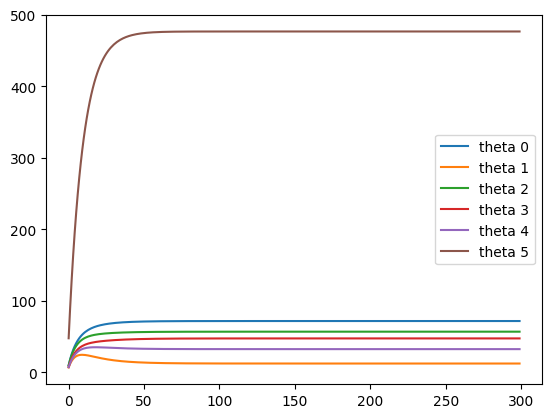

<Figure size 640x480 with 0 Axes>

In [55]:
# TO-DO
for i in range(6):
    plt.plot(range(num_iters),theta_gd_history[i,:],label= f"theta {i}")
# plt.xlim(0, num_iters)
plt.legend()
plt.show()


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc"><font face="vazir" size=3><i>
سرعت همگرایی رگرسیون تک متغیره بیشتر است، چون یک متغیر مستقل دارد.
</i></font></p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
معیار ارزیابی R2 را با استفاده از تابعی که خودتان نوشته‌اید برای خروجی رگرسیون خطی چند متغیره با الگوریتم گرادیان کاهشی محاسبه نمایید. چه تغییری نسب به حالت تک متغیره دارد؟ آیا این تغییر قابل انتظار بود؟ چرا؟</font>
</p>


In [56]:
# TO-DO
y_pred_gradMulti = X @ theta_gd
r2_gradMulti=calculate_r2_score(Y,y_pred_gradMulti)
print(r2_gradMulti)

0.5615825438679802


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc"><font face="vazir" size=3><i>
وقتی تعداد متغیرها افزایش پیدا می کند، دقت هم افزایش پیدا میکند.
</i></font></p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم اثر تغییر نرخ‌یادگیری را بر روند همگرایی الگوریتم گرادیان کاهشی بررسی نماییم. بدین منظور الگوریتم را با مقادیر نرخ یادگیری قرار داده شده در لیست <code>alphas</code> و به تعداد ۲۰۰ گام اجرا کنید و روند تغییرات تابع هزینه در این ۵ بار اجرا را بر روی یک تصویر به نمایش دربیاورید. آیا نتیجه قابل انتظار بود؟</font>
</p>


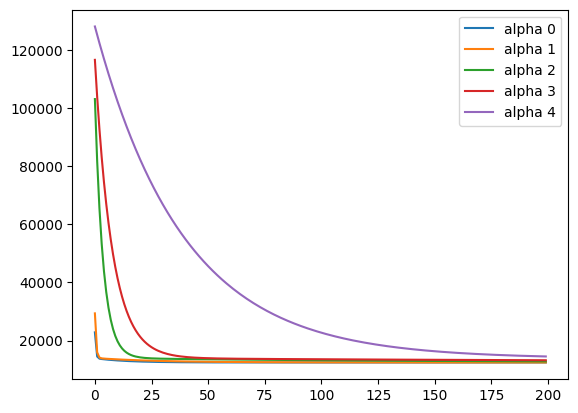

<Figure size 640x480 with 0 Axes>

In [44]:
alphas = [1, 0.5, 0.1, 0.05, 0.01]
theta_gd=[[0],[0]] 
num_iters=200
for i in range(len(alphas)):
    theta_gd=[[0],[0]] 
    theta_gd ,J_history, theta_gd_history=gradientDescent(X, Y, theta_gd, alphas[i], num_iters)
    plt.plot(range(num_iters),J_history,label= f"alpha {i}")
    
    color='tab:blue'
plt.legend()
plt.show()



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc"><font face="vazir" size=3><i>
[تحلیل شما]
انتخاب نرخ یادگیری می تواند به طور قابل توجهی بر عملکرد شیب نزول تأثیر بگذارد. اگر نرخ یادگیری خیلی زیاد باشد، الگوریتم ممکن است از حداقل فراتر رود و اگر خیلی کم باشد، ممکن است همگرا شدن الگوریتم خیلی طول بکشد. بله نتیجه قابل انتظار بود.
</i></font></p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از روش معادلات نرمال مسئله‌ی رگرسیون خطی چند متغیره را حل کنید. ضرایب رگرسیون و کمینه تابع هزینه را گزارش کنید.
</font>
</p>


In [57]:
# TO-DO

m = Y.size
# X = np.append(np.ones((m, 1)), X, axis=1)

tetha_gd=normalEqn(X, Y)

theta_gd, J_history, theta_gd_history=gradientDescentMulti(X, Y, tetha_gd, 1, 10000)
print(theta_gd,np.min(J_history))

[[ 71.79077808]
 [ 12.374066  ]
 [ 56.91471113]
 [ 47.48973687]
 [ 32.50329754]
 [476.67292477]] 7655.04281334199
